## <span style="color:green"> Notebook - Material Class </span>
<span style="color:purple">Sinan Ozaydin, School of Geosciences, The University of Sydney, NSW 2006, Australia <br/> </span>
<span style="color:purple">sinan.ozaydin@protonmail.com</span>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In this notebook, we will learn how to use the material class in pide library. 

Material is an object that can be constructed in *pide* that can be used to define a compositional environment. A user might want to define a material rather than defining the parameters on a *pide* object because they might want to streamline a calculation or append these materials into *model* class to use the other functionalities exist in pide, such as 3D model conversion. First, we have to import neccesary 

In [2]:
from pide.material import Material

Let's define a material using a mineral matrix, a pyroxenite!

In [3]:
Pyroxenite_Material = Material(name = 'Pyroxenite', calculation_type = 'mineral', composition = {'opx':0.6,'cpx':0.3,'ol':0.1},
el_cond_selections = {'opx':0,'cpx':0, 'ol':4}, solid_phase_mixing = 1)

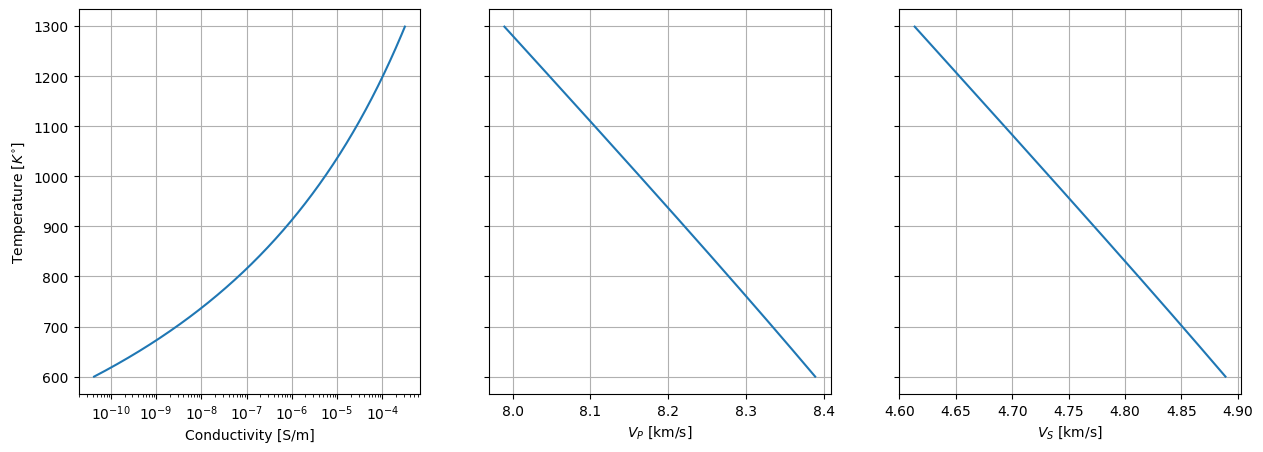

In [13]:
temp = np.arange(600,1300)
p = np.ones(len(temp)) * 3.0
cond_px = Pyroxenite_Material.calculate_conductivity(T = temp, P = p)
v_bulk_px, v_p_px, v_s_px = Pyroxenite_Material.calculate_seismic_velocity(T = temp, P = p)

fig = plt.figure(figsize = (15,5))
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)

ax1.plot(cond_px,temp)
ax2.plot(v_p_px,temp)
ax3.plot(v_s_px,temp)

ax1.set_xscale('log')

ax1.set_ylabel('Temperature [$K^{\circ}$]')
ax1.set_xlabel('Conductivity [S/m]')
ax2.set_xlabel('$V_P$ [km/s]')
ax3.set_xlabel('$V_S$ [km/s]')

ax1.grid(which = 'major')
ax2.grid(which = 'both')
ax3.grid(which = 'both')

ax2.set_yticklabels([])
ax3.set_yticklabels([])
plt.show()

Now, let's define a material with 'rock' method, a granite.

In [5]:
Granite_Material = Material(name = 'Granite', calculation_type = 'rock', composition = {'granite':1.0},
							   el_cond_selections = {'granite': 10},solid_phase_mixing_idx = 1)

Here, we defined the 'Granite_Material' where the electrical conductivity calculation will be carried out as 'rock' method, completely made out of granite, use electrical conductivity selection as the 10th index, use Hashin-Shtrikman Lower Bound to calculate the mixture. Using this material, now let's calculate electrical conductivity and seismic velocities at the given temperature and pressure.

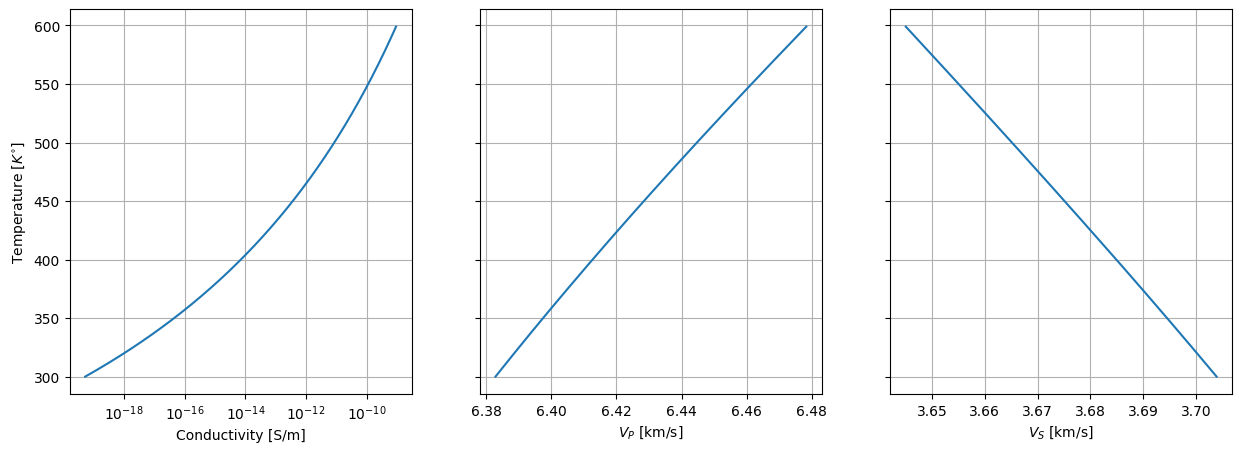

In [6]:
temp = np.arange(300,600)
p = np.ones(len(temp)) * 0.5
cond = Granite_Material.calculate_conductivity(T = temp, P = p)
v_bulk, v_p, v_s = Granite_Material.calculate_seismic_velocity(T = temp, P = p)

fig = plt.figure(figsize = (15,5))
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)

ax1.plot(cond,temp)
ax2.plot(v_p,temp)
ax3.plot(v_s,temp)

ax1.set_xscale('log')

ax1.set_ylabel('Temperature [$K^{\circ}$]')
ax1.set_xlabel('Conductivity [S/m]')
ax2.set_xlabel('$V_P$ [km/s]')
ax3.set_xlabel('$V_S$ [km/s]')

ax1.grid(which = 'major')
ax2.grid(which = 'both')
ax3.grid(which = 'both')

ax2.set_yticklabels([])
ax3.set_yticklabels([])
plt.show()

As One can see an unlikely inverse relationship is there between $V_P$ and temperature. This is due to rare negative thermal expansion coefficients observed in beta-quartz. On the other hand, the electrical conductivity of granite at these temperatures are quite low. This is the general behaviour of silicate rocks who behave as a semi-conductor.

Attributes of a material object can also be copied into another material object. Now, let's try to copy the Pyroxenite object into another object called Pyroxenite_Material_2.

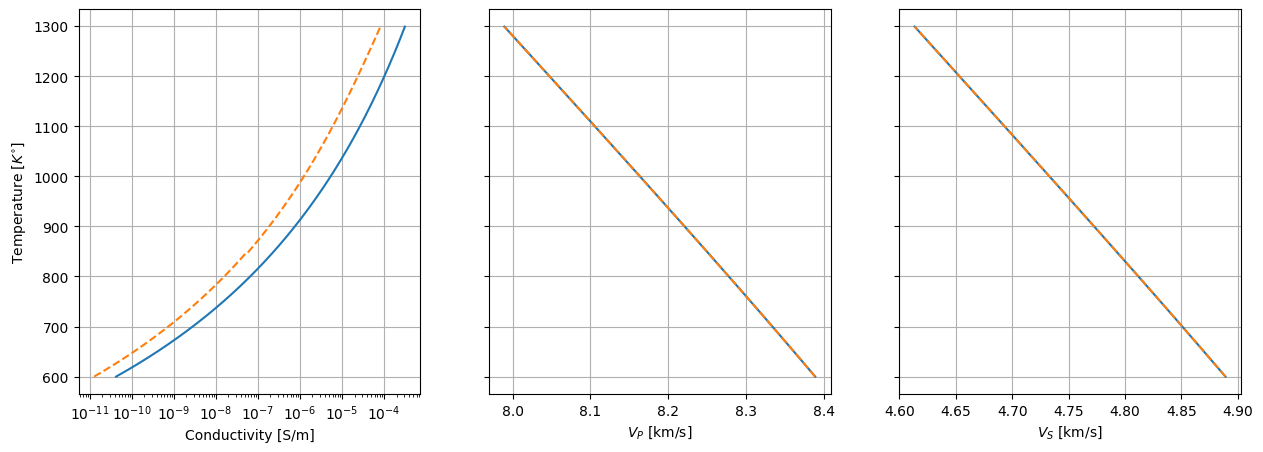

In [24]:
#First create the empty object.
Pyroxenite_Material_2 = Material()
#Now we can copy the attributes using copy_attributes method
Pyroxenite_Material.copy_attributes(Pyroxenite_Material_2)
#Now, let's change the copied materials name and el_cond_method:
Pyroxenite_Material_2.name = 'Pyroxenite_Material_2'
Pyroxenite_Material_2.el_cond_selections = {'opx':5,'cpx':0, 'ol':1}

#Now, let's calculate the same conductivities and plot them!
cond_px_2 = Pyroxenite_Material_2.calculate_conductivity(T = temp, P = p)
v_bulk_px_2, v_p_px_2, v_s_px_2 = Pyroxenite_Material_2.calculate_seismic_velocity(T = temp, P = p)

fig = plt.figure(figsize = (15,5))
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)

ax1.plot(cond_px,temp)
ax1.plot(cond_px_2,temp,linestyle = '--')
ax2.plot(v_p_px,temp)
ax2.plot(v_p_px_2,temp,linestyle = '--')
ax3.plot(v_s_px,temp)
ax3.plot(v_s_px_2,temp,linestyle = '--')

ax1.set_xscale('log')

ax1.set_ylabel('Temperature [$K^{\circ}$]')
ax1.set_xlabel('Conductivity [S/m]')
ax2.set_xlabel('$V_P$ [km/s]')
ax3.set_xlabel('$V_S$ [km/s]')

ax1.grid(which = 'major')
ax2.grid(which = 'both')
ax3.grid(which = 'both')

ax2.set_yticklabels([])
ax3.set_yticklabels([])
plt.show()